In [1]:
from launchpadlib.launchpad import Launchpad
import matplotlib.pyplot as plt
from dateutil.parser import parse
%matplotlib inline

In [2]:
l = Launchpad.login_anonymously('sage-ppa', 'production', version='devel')

In [3]:
sage = l.people['aims'].archive

In [4]:
bins = sage.getPublishedBinaries(binary_name='sagemath-upstream-binary')

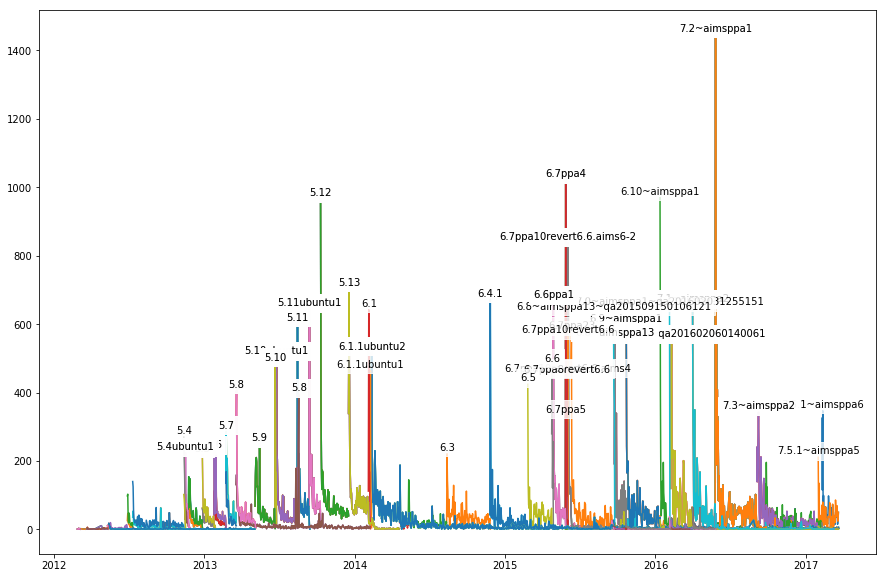

In [5]:
# this takes ~1minute
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for bin in bins:
    down = bin.getDailyDownloadTotals()
    data = [(parse(d), c) for d, c in down.items()]
    data.sort(key=lambda x: x[0])
    if data:
        m = max(data, key=lambda x: x[1])
        if m[1] > 200:
            ax.text(m[0], m[1]+10, bin.binary_package_version,
                    horizontalalignment='center',
                    bbox={'color': 'white', 'alpha':0.8, 'pad': 4})
        data = zip(*data)
        ax.plot(data[0], data[1], label=bin.display_name)